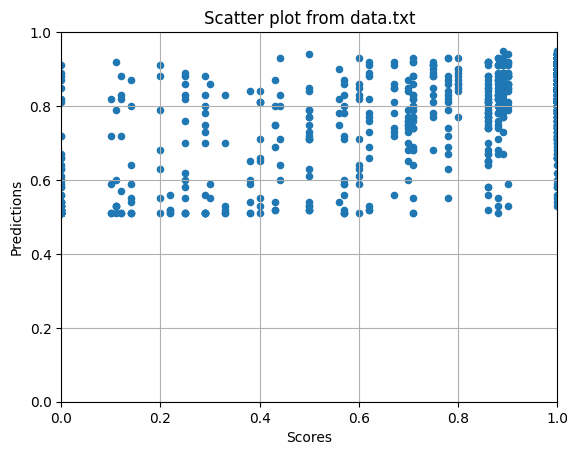

In [19]:
import matplotlib.pyplot as plt
import torch

# 1. Read data from a txt file
file_path = "/home/ubuntu/elec823/log/last_output/WordConfidence_02_val.txt"
with open(file_path, "r") as file:
    lines = file.readlines()

# 2. Parse the lines and extract x and y values
scores = []
predictions = []

for line in lines[1:]:
    x, y = line.strip().split(",")
    scores.append(float(x))
    predictions.append(float(y))

# 3. Plot scatter plot for all lines in the file
point_size = 20
plt.scatter(scores, predictions, s=point_size)

# 4. Add caption, label, and other elements
plt.title("Scatter plot from data.txt")
plt.xlabel("Scores")
plt.ylabel("Predictions")
plt.grid(True)

# Set the limits for both axes
plt.xlim(0, 1)
plt.ylim(0, 1)

# Save the plot to a file
plt.savefig("scatter_plot.png")

# Show the plot
plt.show()


In [20]:
pearson_coef = torch.corrcoef(torch.stack((torch.tensor(scores), torch.tensor(predictions))))[0, 1]
print("Pearson coefficient: ", pearson_coef.item())

Pearson coefficient:  0.7332884669303894


In [21]:
def concordance_correlation_coefficient(y_true, y_pred):
    y_true_mean = torch.mean(y_true)
    y_pred_mean = torch.mean(y_pred)
    
    y_true_var = torch.var(y_true, unbiased=False)
    y_pred_var = torch.var(y_pred, unbiased=False)
    
    covariance = torch.mean((y_true - y_true_mean) * (y_pred - y_pred_mean))
    
    ccc = (2 * covariance) / (y_true_var + y_pred_var + (y_true_mean - y_pred_mean)**2)
    return ccc

print("CCC: ", concordance_correlation_coefficient(torch.tensor(scores), torch.tensor(predictions)).item())

CCC:  0.4939791262149811


In [15]:
for i in range(len(scores)):
    print(scores[i], predictions[i])

1.0 0.88
0.25 0.52
1.0 0.9
1.0 0.82
1.0 0.7
0.88 0.8
0.88 0.88
1.0 0.91
1.0 0.9
1.0 0.9
0.6 0.8
1.0 0.52
0.88 0.81
1.0 0.56
0.7 0.87
1.0 0.74
1.0 0.91
0.9 0.93
0.25 0.51
1.0 0.82
0.0 0.53
0.0 0.76
1.0 0.93
1.0 0.8
1.0 0.86
1.0 0.84
1.0 0.72
0.9 0.84
0.6 0.56
0.29 0.51
0.9 0.81
0.71 0.51
1.0 0.94
0.3 0.51
1.0 0.89
1.0 0.58
0.43 0.64
0.88 0.88
1.0 0.87
1.0 0.9
0.89 0.59
0.25 0.88
1.0 0.89
1.0 0.84
1.0 0.86
0.88 0.87
0.86 0.53
1.0 0.87
0.89 0.58
0.25 0.52
1.0 0.64
0.71 0.69
0.86 0.52
0.6 0.74
1.0 0.91
0.43 0.62
1.0 0.81
1.0 0.84
0.86 0.82
1.0 0.93
1.0 0.87
1.0 0.87
1.0 0.92
1.0 0.9
1.0 0.91
1.0 0.9
1.0 0.92
1.0 0.83
1.0 0.87
0.57 0.61
0.43 0.82
1.0 0.92
0.86 0.89
0.89 0.84
1.0 0.85
0.12 0.67
0.71 0.63
0.0 0.86
1.0 0.92
1.0 0.92
0.44 0.92
0.56 0.7
0.12 0.51
0.88 0.84
0.29 0.51
1.0 0.9
1.0 0.9
1.0 0.85
1.0 0.9
1.0 0.85
0.0 0.51
1.0 0.87
0.71 0.82
0.11 0.66
1.0 0.94
0.14 0.51
0.67 0.82
1.0 0.93
0.0 0.59
1.0 0.91
1.0 0.86
0.9 0.71
0.29 0.88
0.86 0.9
0.14 0.58
1.0 0.85
1.0 0.91
0.78 0.77
1.0 0